In [1]:
import math
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from __future__ import print_function
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
warnings.filterwarnings('ignore',module = 'sklearn')

dg = pd.read_csv('Desktop/ethylene_methane.txt', delim_whitespace=True, skiprows=[0], header=None)
dg = dg.rename(columns = {0:'Time (seconds)', 1:'Methane conc (ppm)', 2:'Ethylene conc (ppm)', 3:'Sensor1',4:'Sensor2',5:'Sensor3',6:'Sensor4',7:'Sensor5',8:'Sensor6',9:'Sensor7',10:'Sensor8',11:'Sensor9',12:'Sensor10',13:'Sensor11',14:'Sensor12',15:'Sensor13',16:'Sensor14',17:'Sensor15',18:'Sensor16'})


In [22]:
dg.head()

,Time (seconds),Methane conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
0,-1.000000,-0.243456,-0.279548,-0.994373,0.043897,-0.993910,-0.981155,-0.725149,-0.726529,-0.997479,-0.996142,-0.116333,-0.137603,0.687683,0.973408,0.978023,0.984303,0.556223,0.665568
1,-1.000000,-0.243456,-0.279548,-0.996127,0.043926,-0.990861,-0.977465,-0.733352,-0.726285,-0.996215,-0.997716,-0.122246,-0.128501,0.681636,0.979057,0.984489,0.982738,0.555336,0.658489
2,-0.999999,-0.243456,-0.279548,-0.992114,0.042439,-0.984575,-0.979102,-0.729669,-0.727649,-0.997778,-0.996740,-0.115349,-0.149350,0.678615,0.982041,0.981973,0.984415,0.557361,0.653340
3,-0.999999,-0.243456,-0.279548,-0.997625,0.042176,-0.992071,-0.982103,-0.731765,-0.725018,-0.991402,-0.995269,-0.125521,-0.148588,0.682264,0.969963,0.980536,0.982068,0.557741,0.663648
4,-0.999998,-0.243456,-0.279548,-0.992556,0.045564,-0.993565,-0.980838,-0.726549,-0.726385,-0.997117,-0.996249,-0.117317,-0.149724,0.678112,0.973094,0.985330,0.984415,0.570951,0.675614


In [23]:
dg.describe().T

,count,mean,std,min,25%,50%,75%,max
Time (seconds),4178504.0,2.792908e-16,0.577347,-1.000000,-0.500053,0.000051,0.499988,0.999946
Methane conc (ppm),4178504.0,1.387290e-12,0.321225,-0.243456,-0.243456,-0.243456,0.175682,1.000000
Ethylene conc (ppm),4178504.0,3.510673e-13,0.353238,-0.279548,-0.279548,-0.279548,0.253384,1.000000
Sensor1,4178504.0,-7.116452e-16,0.098269,-1.000000,-0.071813,-0.021992,0.060844,0.342463
Sensor2,4178504.0,-1.277342e-14,0.014601,-0.017570,-0.008927,-0.001251,0.005315,1.000000
Sensor3,4178504.0,-1.554358e-14,0.409306,-0.997699,-0.418126,0.045909,0.370847,1.000000
Sensor4,4178504.0,3.795961e-15,0.404965,-0.984102,-0.415640,0.053044,0.367479,1.000000
Sensor5,4178504.0,-2.127945e-14,0.432035,-0.733481,-0.408002,-0.183798,0.371480,1.000000
Sensor6,4178504.0,-4.541389e-14,0.429089,-0.731154,-0.398901,-0.210014,0.367015,1.000000
Sensor7,4178504.0,-4.842293e-15,0.407653,-1.000000,-0.427568,0.035379,0.340374,0.966373


In [2]:
#Linear Regression
#Using MinMax for modeling Methane Concentrations
msc = MinMaxScaler()

dg = pd.DataFrame(msc.fit_transform(dg),columns = dg.columns)

y_meth = 'Methane conc (ppm)'
feature_cols = [x for x in dg.columns if x != y_meth]
X_data = dg[feature_cols]
y_data_meth = dg[y_meth]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_meth,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_meth = GridSearchCV(LR,parameters, cv=3)
grid_meth.fit(X_train, y_train)

print ("r2 / variance : ", grid_meth.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_meth.predict(X_test) - y_test) ** 2))

minmaxscaler_r2_LR = grid_meth.best_score_
minmaxscaler_residual_LR = np.mean((grid_meth.predict(X_test) - y_test) ** 2)
minmaxscaler_squared_LR = mean_squared_error(y_test,grid_meth.predict(X_test))

r2 / variance :  0.6846052299541913
Residual sum of squares: 0.02


In [3]:
grid_meth.best_estimator_

LinearRegression()

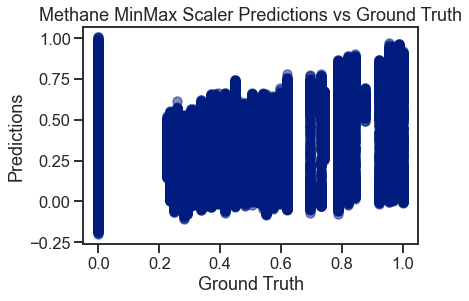

In [4]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid_meth.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Methane MinMax Scaler Predictions vs Ground Truth');

In [5]:
#Using Standard Scaler
std = StandardScaler()

dg = pd.DataFrame(std.fit_transform(dg),columns = dg.columns)

y_meth = 'Methane conc (ppm)'
feature_cols = [x for x in dg.columns if x != y_meth]
X_data = dg[feature_cols]
y_data_meth = dg[y_meth]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_meth,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_meth = GridSearchCV(LR,parameters, cv=3)
grid_meth.fit(X_train, y_train)

print ("r2 / variance : ", grid_meth.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_meth.predict(X_test) - y_test) ** 2))

stdscaler_r2_LR = grid_meth.best_score_
stdxscaler_residual_LR = np.mean((grid_meth.predict(X_test) - y_test) ** 2)
stdscaler_squared_LR = mean_squared_error(y_test,grid_meth.predict(X_test))

r2 / variance :  0.6846052764508329
Residual sum of squares: 0.31


In [6]:
grid_meth.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

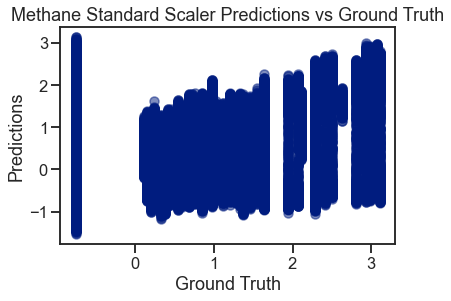

In [7]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid_meth.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Methane Standard Scaler Predictions vs Ground Truth');

In [8]:
#Using MaxAbs Scaler
mabs = MaxAbsScaler()

dg = pd.DataFrame(msc.fit_transform(dg),columns = dg.columns)

y_meth = 'Methane conc (ppm)'
feature_cols = [x for x in dg.columns if x != y_meth]
X_data = dg[feature_cols]
y_data_meth = dg[y_meth]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_meth,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_meth = GridSearchCV(LR,parameters, cv=3)
grid_meth.fit(X_train, y_train)

print ("r2 / variance : ", grid_meth.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_meth.predict(X_test) - y_test) ** 2))

maxabscaler_r2_LR = grid_meth.best_score_
maxabscaler_residual_LR = np.mean((grid_meth.predict(X_test) - y_test) ** 2)
maxabscaler_squared_LR = mean_squared_error(y_test,grid_meth.predict(X_test))

r2 / variance :  0.6846052299541915
Residual sum of squares: 0.02


In [9]:
grid_meth.best_estimator_

LinearRegression()

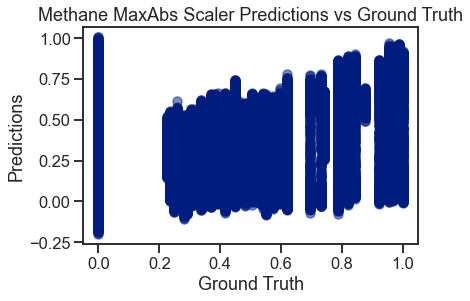

In [10]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid_meth.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Methane MaxAbs Scaler Predictions vs Ground Truth');

In [11]:
Variance_Meth_LR = {'MinMaxScaler - Methane' : minmaxscaler_r2_LR,
           'StandardScaler -Methane': stdscaler_r2_LR,
           'MaxAbsScaler - Methane' : maxabscaler_r2_LR}

Residual_Sum_of_Squares_Meth_LR = {'MinMaxScaler - Methane' :minmaxscaler_residual_LR,
           'StandardScaler - Methane': stdxscaler_residual_LR,
           'MaxAbsScaler - Methane' : maxabscaler_residual_LR}
Mean_Squared_Error_Meth_LR = {'MinMaxScaler - Methane': minmaxscaler_squared_LR,
           'StandardScaler - Methane': stdscaler_squared_LR,
           'MaxAbsScaler - Methane' : maxabscaler_squared_LR}

print(Variance_Meth_LR)

print(Residual_Sum_of_Squares_Meth_LR)

print(Mean_Squared_Error_Meth_LR)


{'MinMaxScaler - Methane': 0.6846052299541913, 'StandardScaler -Methane': 0.6846052764508329, 'MaxAbsScaler - Methane': 0.6846052299541915}
{'MinMaxScaler - Methane': 0.021017783720493427, 'StandardScaler - Methane': 0.3149414633604787, 'MaxAbsScaler - Methane': 0.021017783720493465}
{'MinMaxScaler - Methane': 0.021017783720493274, 'StandardScaler - Methane': 0.3149414633604744, 'MaxAbsScaler - Methane': 0.02101778372049327}


In [12]:
#Now considering Ethylene detection
#MinMax Scaler
msc = MinMaxScaler()

dg = pd.DataFrame(msc.fit_transform(dg),columns = dg.columns)

y_eth = 'Ethylene conc (ppm)'
feature_cols = [x for x in dg.columns if x != y_eth]
X_data = dg[feature_cols]
y_data_eth = dg[y_eth]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_eth,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_eth = GridSearchCV(LR,parameters, cv=3)
grid_eth.fit(X_train, y_train)

print ("r2 / variance : ", grid_eth.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_eth.predict(X_test) - y_test) ** 2))

minmaxscaler_r2_eth = grid_eth.best_score_
minmaxscaler_residual_eth = np.mean((grid_eth.predict(X_test) - y_test) ** 2)
minmaxscaler_squared_eth = mean_squared_error(y_test,grid_eth.predict(X_test))

r2 / variance :  0.6302109948687982
Residual sum of squares: 0.03


In [13]:
grid_eth.best_estimator_

LinearRegression(normalize=True)

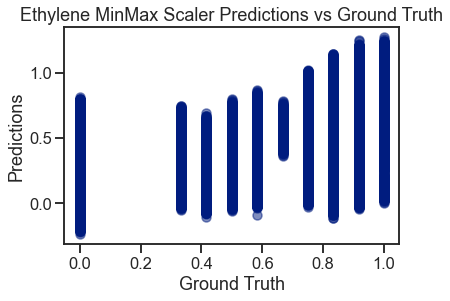

In [14]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid_eth.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Ethylene MinMax Scaler Predictions vs Ground Truth');

In [15]:
#Using Std Scaler
std = StandardScaler()

dg = pd.DataFrame(std.fit_transform(dg),columns = dg.columns)

y_eth = 'Ethylene conc (ppm)'
feature_cols = [x for x in dg.columns if x != y_eth]
X_data = dg[feature_cols]
y_data_eth = dg[y_eth]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_eth,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_eth = GridSearchCV(LR,parameters, cv=3)
grid_eth.fit(X_train, y_train)

print ("r2 / variance : ", grid_eth.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_eth.predict(X_test) - y_test) ** 2))

stdscaler_r2_eth = grid_eth.best_score_
stdscaler_residual_eth = np.mean((grid_eth.predict(X_test) - y_test) ** 2)
stdscaler_squared_eth = mean_squared_error(y_test,grid_eth.predict(X_test))

r2 / variance :  0.6302110435078742
Residual sum of squares: 0.37


In [16]:
grid_eth.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

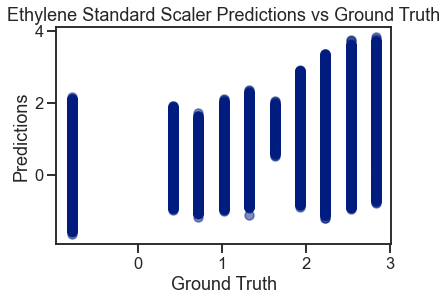

In [17]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid_eth.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Ethylene Standard Scaler Predictions vs Ground Truth');

In [18]:
mabs = MaxAbsScaler()

dg = pd.DataFrame(mabs.fit_transform(dg),columns = dg.columns)

y_eth = 'Ethylene conc (ppm)'
feature_cols = [x for x in dg.columns if x != y_eth]
X_data = dg[feature_cols]
y_data_eth = dg[y_eth]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_eth,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_eth = GridSearchCV(LR,parameters, cv=3)
grid_eth.fit(X_train, y_train)

print ("r2 / variance : ", grid_eth.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_eth.predict(X_test) - y_test) ** 2))

maxabscaler_r2_eth = grid_eth.best_score_
maxabscaler_residual_eth = np.mean((grid_eth.predict(X_test) - y_test) ** 2)
maxabscaler_squared_eth = mean_squared_error(y_test,grid_eth.predict(X_test))

r2 / variance :  0.6302110435078742
Residual sum of squares: 0.05


In [19]:
grid_eth.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

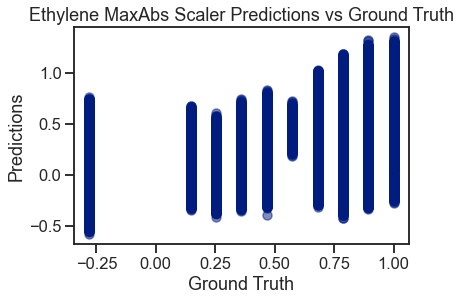

In [20]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid_eth.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Ethylene MaxAbs Scaler Predictions vs Ground Truth');

In [21]:
Variance_Eth_LR = {'MinMaxScaler - Ethylene' : minmaxscaler_r2_eth,
           'StandardScaler - Ethylene': stdscaler_r2_eth,
           'MaxAbsScaler - Ethylene' : maxabscaler_r2_eth}

Residual_Sum_of_Squares_Eth_LR = {'MinMaxScaler - Ethylene' :minmaxscaler_residual_eth,
           'StandardScaler - Ethylene': stdscaler_residual_eth,
           'MaxAbsScaler - Ethylene' : maxabscaler_residual_eth}
Mean_Squared_Error_Eth_LR = {'MinMaxScaler - Ethylene': minmaxscaler_squared_eth,
           'StandardScaler - Ethylene': stdscaler_squared_eth,
           'MaxAbsScaler - Ethylene' : maxabscaler_squared_eth}

print(Variance_Eth_LR)

print(Residual_Sum_of_Squares_Eth_LR)

print(Mean_Squared_Error_Eth_LR)

{'MinMaxScaler - Ethylene': 0.6302109948687982, 'StandardScaler - Ethylene': 0.6302110435078742, 'MaxAbsScaler - Ethylene': 0.6302110435078742}
{'MinMaxScaler - Ethylene': 0.028181032976002385, 'StandardScaler - Ethylene': 0.3697723726671941, 'MaxAbsScaler - Ethylene': 0.04613914000613675}
{'MinMaxScaler - Ethylene': 0.028181032976002152, 'StandardScaler - Ethylene': 0.36977237266721236, 'MaxAbsScaler - Ethylene': 0.04613914000613482}
